# Rock or Mine with SVC model

## Importing Libraries

In [191]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [ ]:
'''
from google.colab import drive
drive.mount('/content/drive')
'''
# If you want to use Colab and Google Drive like I did, just remove the quotes.

In [193]:
DATABASE_PATH = ''
df = pd.read_csv(DATABASE_PATH)

In [194]:
df.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0.0200  207 non-null    float64
 1   0.0371  207 non-null    float64
 2   0.0428  207 non-null    float64
 3   0.0207  207 non-null    float64
 4   0.0954  207 non-null    float64
 5   0.0986  207 non-null    float64
 6   0.1539  207 non-null    float64
 7   0.1601  207 non-null    float64
 8   0.3109  207 non-null    float64
 9   0.2111  207 non-null    float64
 10  0.1609  207 non-null    float64
 11  0.1582  207 non-null    float64
 12  0.2238  207 non-null    float64
 13  0.0645  207 non-null    float64
 14  0.0660  207 non-null    float64
 15  0.2273  207 non-null    float64
 16  0.3100  207 non-null    float64
 17  0.2999  207 non-null    float64
 18  0.5078  207 non-null    float64
 19  0.4797  207 non-null    float64
 20  0.5783  207 non-null    float64
 21  0.5071  207 non-null    float64
 22  0.

In [196]:
df.isnull().sum().sum()

0

In [197]:
df.shape

(207, 61)

In [198]:
df['R'].value_counts()

,count
R,
M,111
R,96


This line indicates there is a slight imbalance in the target column. To correct this we will use the **StratifiedKFold** function.

## Transforming data

In [199]:
X = df.iloc[:,:60].to_numpy()
y = df.iloc[:,60:]
y = y.replace({'R':0,'M':1})
y = y.to_numpy()
y = y.flatten()

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=32)

## Creating a pipeline

In [201]:
model = make_pipeline(StandardScaler(),SVC(kernel='rbf'))
cv = StratifiedKFold(n_splits=10,shuffle=True,random_state=32)
C = np.logspace(-3,3,7)
gamma = np.logspace(-4,1,6)
param_grid = {
    'svc__gamma':gamma,
    'svc__C':C
}
grid = GridSearchCV(model,param_grid=param_grid)

We will use a technique called **Cross-Validation** to evaluate the best parameters,and we will standardize the data using the **StandardScaler** object.

In [202]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'svc__gamma': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])})

## Results

In [203]:
print(grid.best_params_)

{'svc__C': 10.0, 'svc__gamma': 0.01}


In [204]:
print(grid.best_score_)

0.8666666666666666


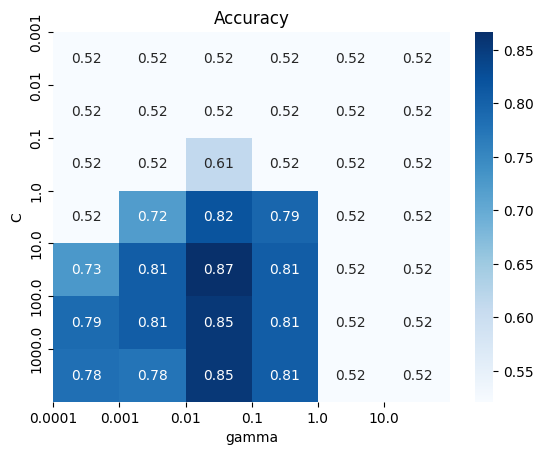

In [205]:
scores = grid.cv_results_['mean_test_score'].reshape(len(C),len(gamma))
sns.heatmap(scores,cmap='Blues',annot=True)

plt.xlabel('gamma')
plt.ylabel('C')
plt.xticks(np.arange(len(gamma)),gamma)
plt.yticks(np.arange(len(C)),C)
plt.title("Accuracy")
plt.show()

In [206]:
model_v2 = SVC(kernel='rbf',C=grid.best_params_['svc__C'],gamma=grid.best_params_['svc__gamma'])
model.fit(X_train,y_train)
preds = model.predict(X_test)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.9818181818181818
0.8809523809523809
